In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import matplotlib.pyplot as plt

In [4]:
# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m:>02}:{s:>05.2f}"

## Read the Data from H5 file. (all inputs are already scaled)

In [5]:
h5file = h5py.File('/content/drive/MyDrive/Finally training Data/Finally_Training_dataHS_10265_not_scaled.h5', 'r' )

In [6]:
xyfor = np.array(h5file['Training data not scaled/xyfornotscaled'])
label = np.array(h5file['Training data not scaled/Labels'])
print(xyfor.shape)
print(label.shape)
h5file.close()
print(label[8000:8005,:])

(10265, 272, 101, 3)
(10265, 6)
[[2.5  0.4  0.18 0.04 0.3  0.62]
 [2.4  0.41 0.12 0.07 0.3  1.1 ]
 [2.4  0.41 0.12 0.01 0.9  0.98]
 [2.1  0.37 0.2  0.07 0.1  0.86]
 [2.1  0.4  0.12 0.04 0.9  0.74]]


# Splitting the Data

In [7]:
X_train = xyfor[:8000,:,:]
Y_train = label[:8000,:]
X_test  = xyfor[8000:10000,:,:]
Y_test  = label[8000:10000,:]
X_predict = xyfor[10000:10150,:,:]
Y_predict = label[10000:10150,:]
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(X_predict.shape)
print(Y_predict.shape)
#print(X_train[0])

(8000, 272, 101, 3)
(8000, 6)
(2000, 272, 101, 3)
(2000, 6)
(150, 272, 101, 3)
(150, 6)


In [8]:
import tensorflow as tf
import datetime

In [9]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

# CNN neural network with  for regression

In [10]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
import time

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 272x101 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(272, 101, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='PReLU'),
    tf.keras.layers.Dense(256, activation='PReLU'),
    tf.keras.layers.Dense(64, activation='PReLU'),
    tf.keras.layers.Dense(32, activation='PReLU'),
    tf.keras.layers.Dense(6)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 270, 99, 64)       1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 135, 49, 64)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 133, 47, 64)       36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 66, 23, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 97152)             0         
                                                                 
 dense (Dense)               (None, 512)               4

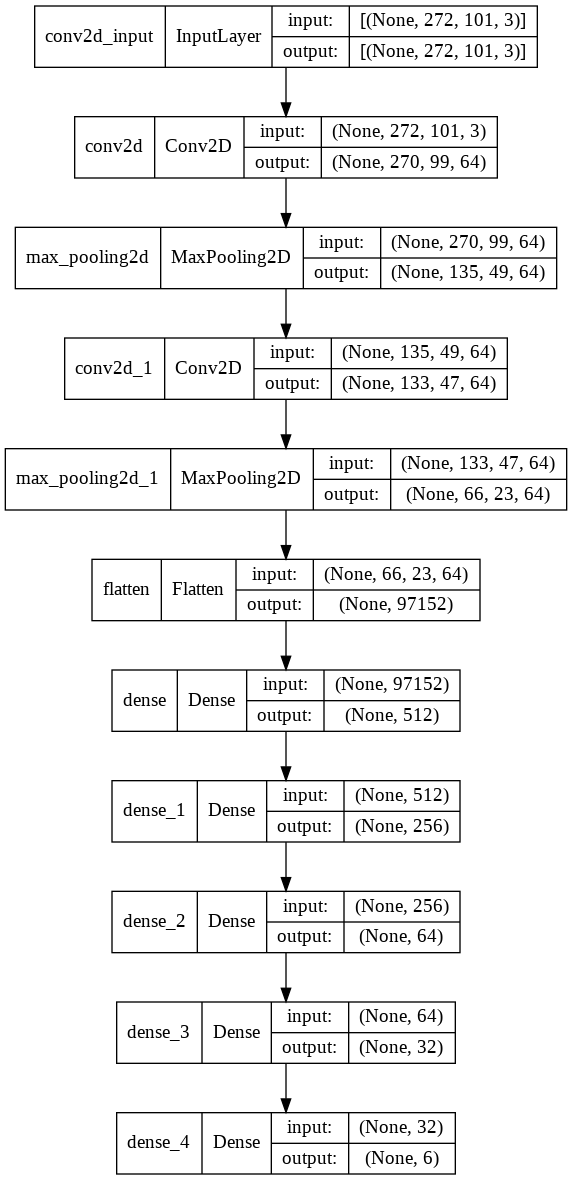

In [11]:
keras.utils.plot_model(model, "one node NN.png", show_shapes=True)

In [12]:
model.compile(optimizer='Adamax', loss='mse', metrics=['mae'])

In [14]:
start_time = time.time()
history = model.fit(X_train, Y_train,  
  verbose = 1, 
  validation_split=0.2, epochs=1600, batch_size=10)

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/1600
640/640 [==============================] - 12s 16ms/step - loss: 0.1843 - mae: 0.1392 - val_loss: 0.0207 - val_mae: 0.1007
Epoch 2/1600
640/640 [==============================] - 10s 15ms/step - loss: 0.0186 - mae: 0.0895 - val_loss: 0.0171 - val_mae: 0.0831
Epoch 3/1600
640/640 [==============================] - 10s 15ms/step - loss: 0.0171 - mae: 0.0862 - val_loss: 0.0172 - val_mae: 0.0787
Epoch 4/1600
640/640 [==============================] - 10s 15ms/step - loss: 0.0160 - mae: 0.0825 - val_loss: 0.0150 - val_mae: 0.0746
Epoch 5/1600
640/640 [==============================] - 10s 15ms/step - loss: 0.0152 - mae: 0.0789 - val_loss: 0.0150 - val_mae: 0.0860
Epoch 6/1600
640/640 [==============================] - 10s 15ms/step - loss: 0.0152 - mae: 0.0771 - val_loss: 0.0131 - val_mae: 0.0700
Epoch 7/1600
640/640 [==============================] - 10s 15ms/step - loss: 0.0146 - mae: 0.0750 - val_loss: 0.0125 - val_mae: 0.0610
Epoch 8/1600
640/640 [==========================

In [15]:
model.evaluate(X_test, Y_test)

63/63 [==============================] - 1s 9ms/step - loss: 1.0293e-04 - mae: 0.0035


[0.00010293468221789226, 0.0035219357814639807]

In [16]:
# we get a sample data (the first 2 inputs from the training data)
to_predict = X_predict[0:150]
# we call the predict method
predictions = model.predict(to_predict)
predictions=np.around(predictions, decimals=2)

# print the predictions

print('        predictions values')
print('   E','   PR','   A','   B','   C','   N')
print(predictions[10:15,:])
print()
print('          original values')
print('   E','   PR','   A','   B','   C','   N')
print(Y_predict[10:15,:])

        predictions values
   E    PR    A    B    C    N
[[2.6  0.37 0.2  0.06 0.31 0.62]
 [2.11 0.41 0.12 0.03 0.3  0.85]
 [2.6  0.39 0.16 0.01 0.68 0.73]
 [2.2  0.37 0.18 0.06 0.9  0.98]
 [2.2  0.41 0.12 0.03 0.5  0.74]]

          original values
   E    PR    A    B    C    N
[[2.6  0.37 0.2  0.06 0.3  0.62]
 [2.1  0.41 0.12 0.03 0.3  0.86]
 [2.6  0.39 0.16 0.01 0.7  0.74]
 [2.2  0.37 0.18 0.06 0.9  0.98]
 [2.2  0.41 0.12 0.03 0.5  0.74]]


# Plotting to compare between the predicted Value and original Value (what it should be)

In [17]:
print(predictions.shape)
print(Y_predict.shape)

(150, 6)
(150, 6)


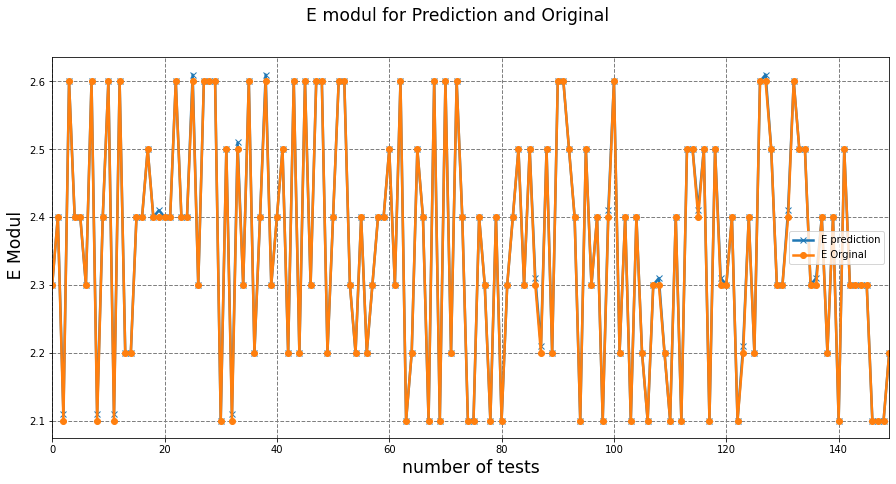

In [18]:
x  = np.arange(150)
y1 = predictions[:,0]
y2 = Y_predict[:,0]

### Using plt.xxx functions
plt.figure(figsize=(15,7))
plt.plot(x, y1, lw=2.5 , label='E prediction',marker='x')
plt.plot(x, y2, lw=2.5 , label='E Orginal',marker='o')

plt.xlim( x.min(), x.max())
plt.xlabel( 'number of tests',fontsize='xx-large')
plt.ylabel( ' E Modul',fontsize='xx-large' )
plt.grid( ls='--', color='gray', linewidth=1 )
plt.legend()
plt.suptitle( 'E modul for Prediction and Original',fontsize='xx-large' )
plt.show()

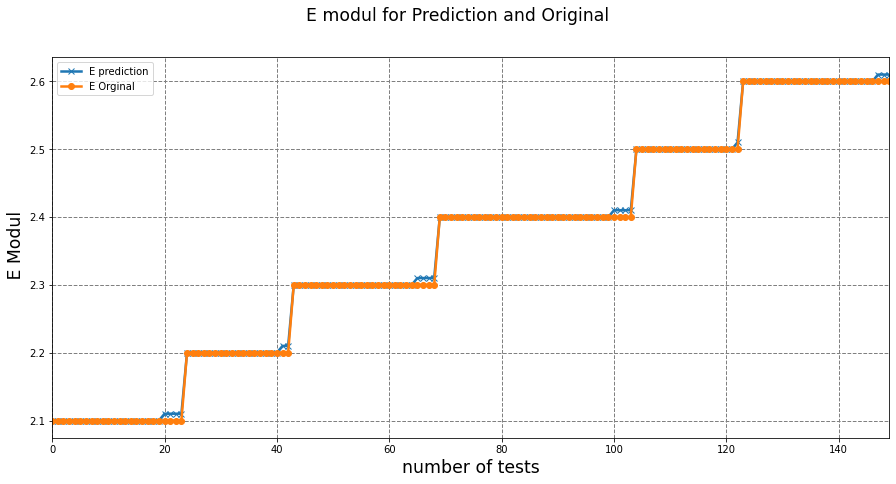

In [19]:
x  = np.arange(150)
y1 = predictions[:,0]
y2 = Y_predict[:,0]
y1 = np.sort(y1)
y2 = np.sort(y2)
### Using plt.xxx functions
plt.figure(figsize=(15,7))
plt.plot(x, y1, lw=2.5 , label='E prediction',marker='x')
plt.plot(x, y2, lw=2.5 , label='E Orginal',marker='o')

plt.xlim( x.min(), x.max())
plt.xlabel( 'number of tests',fontsize='xx-large')
plt.ylabel( ' E Modul',fontsize='xx-large' )
plt.grid( ls='--', color='gray', linewidth=1 )
plt.legend()
plt.suptitle( 'E modul for Prediction and Original',fontsize='xx-large' )
plt.show()

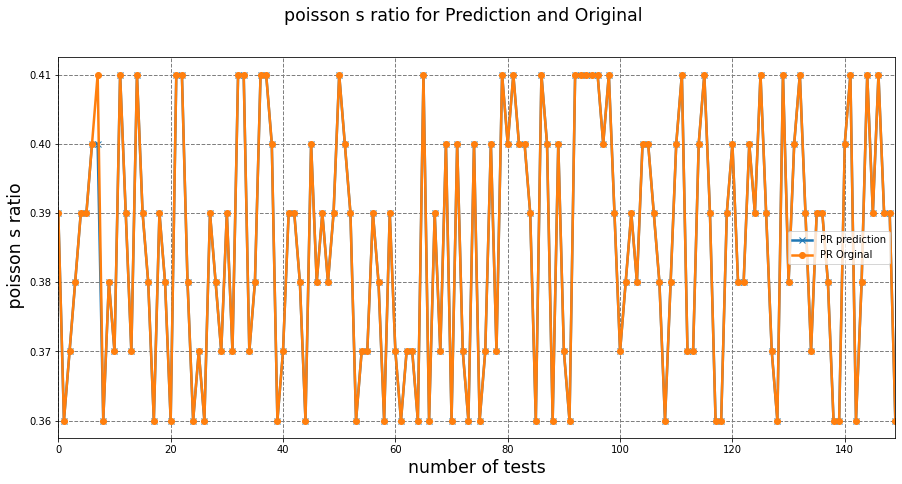

In [20]:
x  = np.arange(150)
y1 = predictions[:,1]
y2 = Y_predict[:,1]
### Using plt.xxx functions
plt.figure(figsize=(15,7))
plt.plot(x, y1, lw=2.5 , label='PR prediction',marker='x')
plt.plot(x, y2, lw=2.5 , label='PR Orginal',marker='o')

plt.xlim( x.min(), x.max())
plt.xlabel( 'number of tests',fontsize='xx-large')
plt.ylabel( ' poisson s ratio',fontsize='xx-large' )
plt.grid( ls='--', color='gray', linewidth=1 )
plt.legend()
plt.suptitle( 'poisson s ratio for Prediction and Original',fontsize='xx-large' )
plt.show()

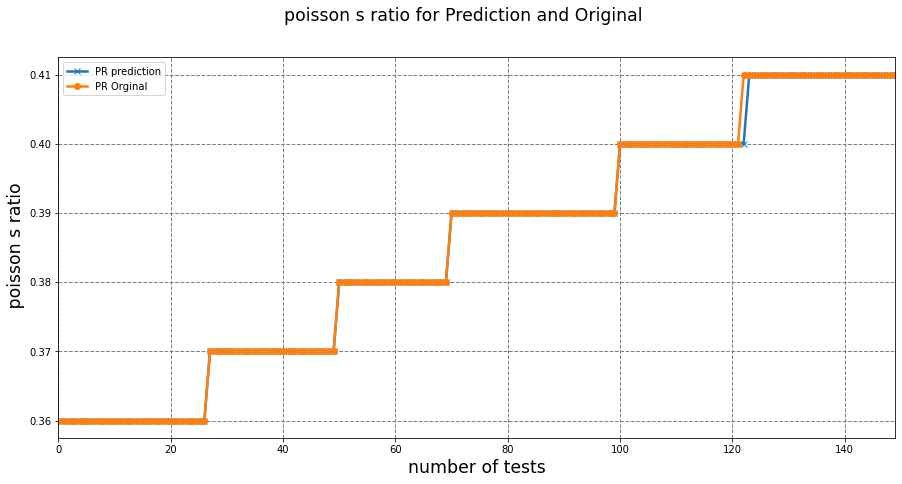

In [21]:
x  = np.arange(150)
y1 = predictions[:,1]
y2 = Y_predict[:,1]
y1 = np.sort(y1)
y2 = np.sort(y2)
### Using plt.xxx functions
plt.figure(figsize=(15,7))
plt.plot(x, y1, lw=2.5 , label='PR prediction',marker='x')
plt.plot(x, y2, lw=2.5 , label='PR Orginal',marker='o')

plt.xlim( x.min(), x.max())
plt.xlabel( 'number of tests',fontsize='xx-large')
plt.ylabel( ' poisson s ratio',fontsize='xx-large' )
plt.grid( ls='--', color='gray', linewidth=1 )
plt.legend()
plt.suptitle( 'poisson s ratio for Prediction and Original',fontsize='xx-large' )
plt.show()

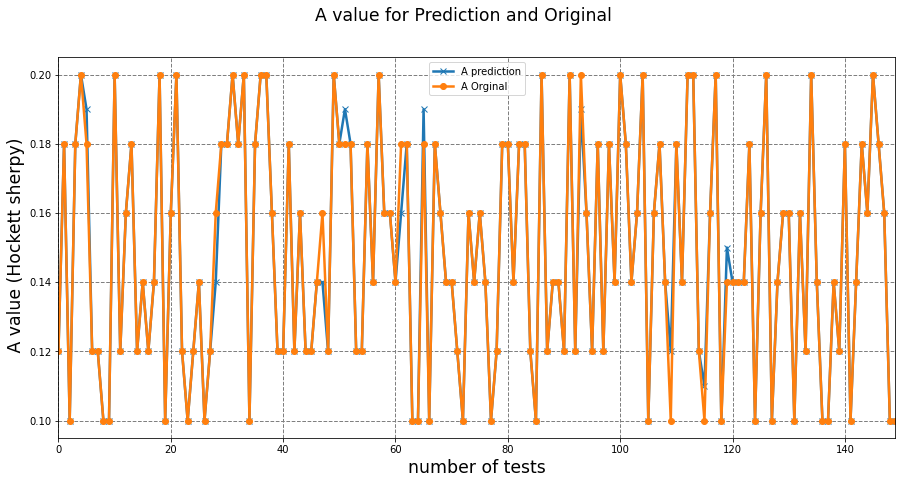

In [22]:
x  = np.arange(150)
y1 = predictions[:,2]
y2 = Y_predict[:,2]
### Using plt.xxx functions
plt.figure(figsize=(15,7))
plt.plot(x, y1, lw=2.5 , label='A prediction',marker='x')
plt.plot(x, y2, lw=2.5 , label='A Orginal',marker='o')

plt.xlim( x.min(), x.max())
plt.xlabel( 'number of tests',fontsize='xx-large')
plt.ylabel( ' A value (Hockett sherpy)',fontsize='xx-large' )
plt.grid( ls='--', color='gray', linewidth=1 )
plt.legend()
plt.suptitle('A value for Prediction and Original',fontsize='xx-large' )
plt.show()

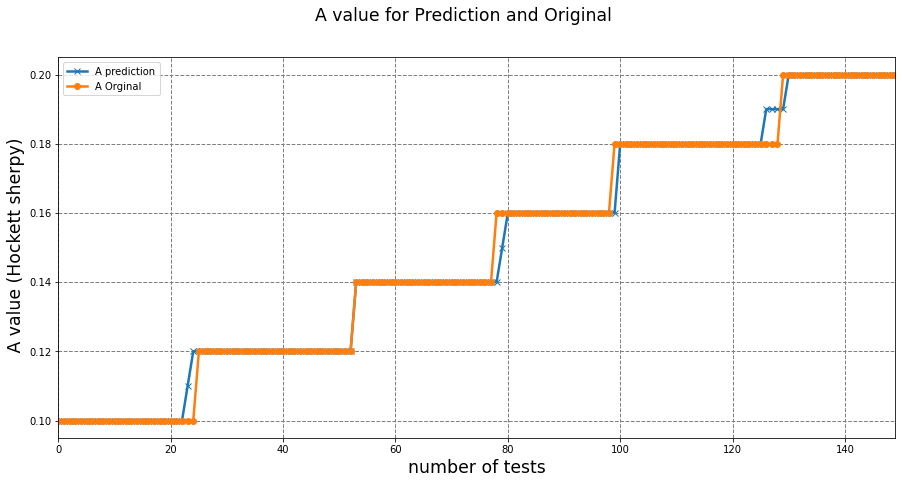

In [23]:
x  = np.arange(150)
y1 = predictions[:,2]
y2 = Y_predict[:,2]
y1 = np.sort(y1)
y2 = np.sort(y2)
### Using plt.xxx functions
plt.figure(figsize=(15,7))
plt.plot(x, y1, lw=2.5 , label='A prediction',marker='x')
plt.plot(x, y2, lw=2.5 , label='A Orginal',marker='o')

plt.xlim( x.min(), x.max())
plt.xlabel( 'number of tests',fontsize='xx-large')
plt.ylabel( ' A value (Hockett sherpy)',fontsize='xx-large' )
plt.grid( ls='--', color='gray', linewidth=1 )
plt.legend()
plt.suptitle('A value for Prediction and Original',fontsize='xx-large' )
plt.show()

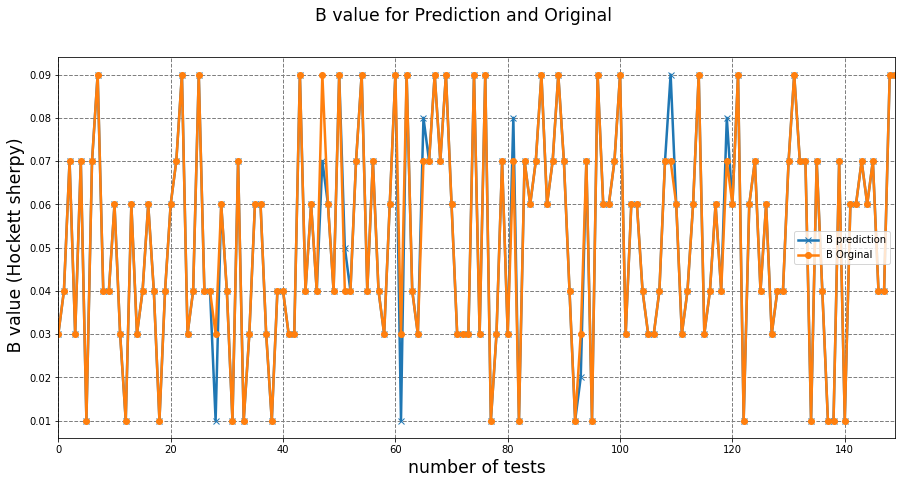

In [24]:
x  = np.arange(150)
y1 = predictions[:,3]
y2 = Y_predict[:,3]
### Using plt.xxx functions
plt.figure(figsize=(15,7))
plt.plot(x, y1, lw=2.5 , label='B prediction',marker='x')
plt.plot(x, y2, lw=2.5 , label='B Orginal',marker='o')

plt.xlim( x.min(), x.max())
plt.xlabel( 'number of tests',fontsize='xx-large')
plt.ylabel( ' B value (Hockett sherpy)',fontsize='xx-large' )
plt.grid( ls='--', color='gray', linewidth=1 )
plt.legend()
plt.suptitle('B value for Prediction and Original',fontsize='xx-large' )
plt.show()

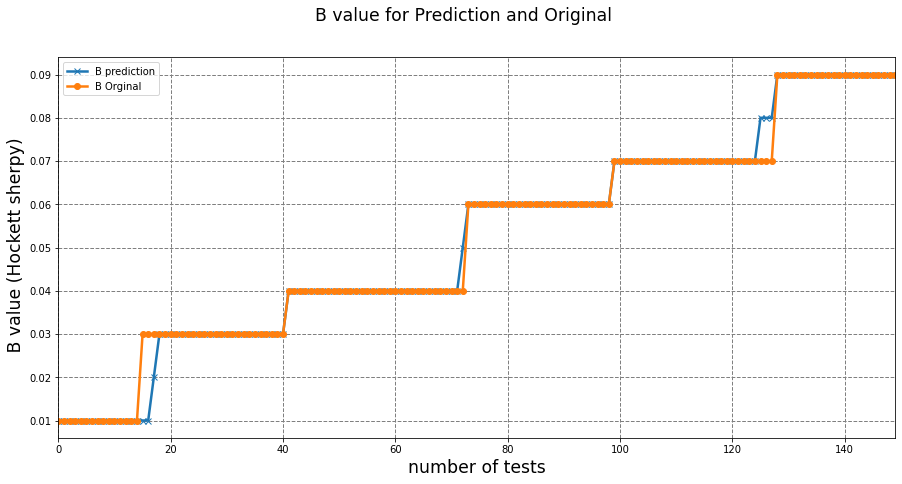

In [25]:
x  = np.arange(150)
y1 = predictions[:,3]
y2 = Y_predict[:,3]
y1 = np.sort(y1)
y2 = np.sort(y2)
### Using plt.xxx functions
plt.figure(figsize=(15,7))
plt.plot(x, y1, lw=2.5 , label='B prediction',marker='x')
plt.plot(x, y2, lw=2.5 , label='B Orginal',marker='o')

plt.xlim( x.min(), x.max())
plt.xlabel( 'number of tests',fontsize='xx-large')
plt.ylabel( ' B value (Hockett sherpy)',fontsize='xx-large' )
plt.grid( ls='--', color='gray', linewidth=1 )
plt.legend()
plt.suptitle('B value for Prediction and Original',fontsize='xx-large' )
plt.show()

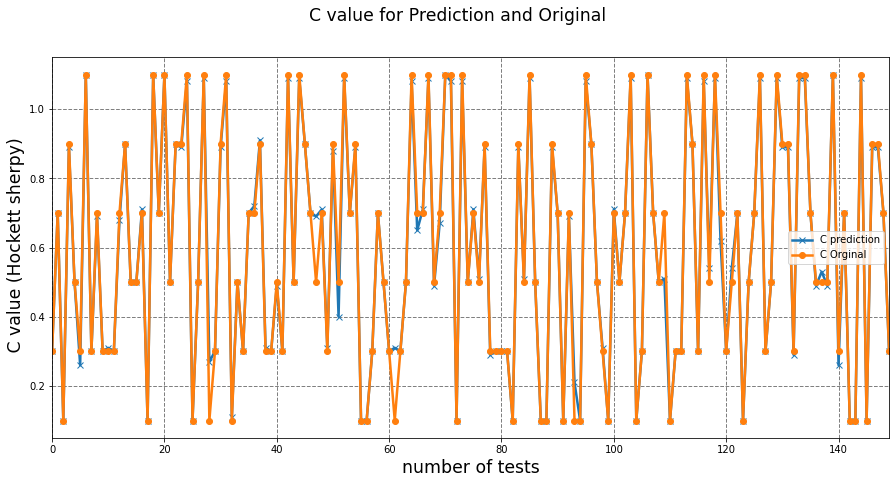

In [26]:
x  = np.arange(150)
y1 = predictions[:,4]
y2 = Y_predict[:,4]
### Using plt.xxx functions
plt.figure(figsize=(15,7))
plt.plot(x, y1, lw=2.5 , label='C prediction',marker='x')
plt.plot(x, y2, lw=2.5 , label='C Orginal',marker='o')

plt.xlim( x.min(), x.max())
plt.xlabel( 'number of tests',fontsize='xx-large')
plt.ylabel( ' C value (Hockett sherpy)',fontsize='xx-large' )
plt.grid( ls='--', color='gray', linewidth=1 )
plt.legend()
plt.suptitle('C value for Prediction and Original',fontsize='xx-large' )
plt.show()

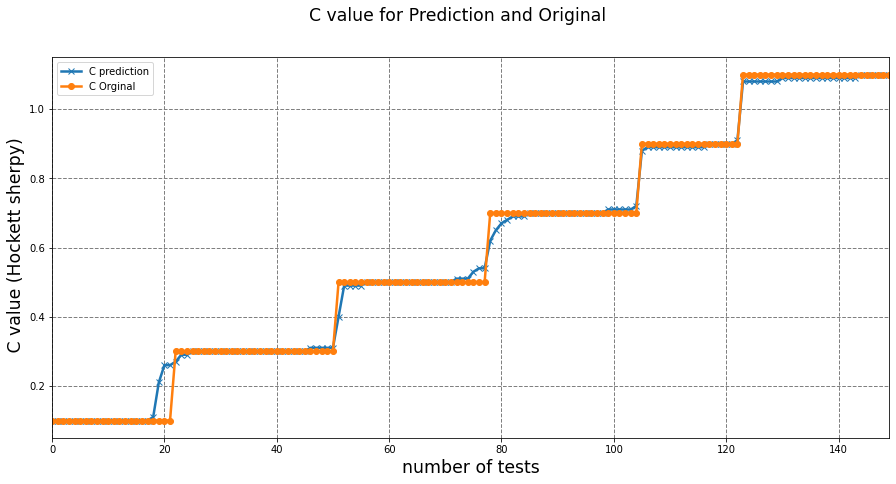

In [27]:
x  = np.arange(150)
y1 = predictions[:,4]
y2 = Y_predict[:,4]
y1 = np.sort(y1)
y2 = np.sort(y2)
### Using plt.xxx functions
plt.figure(figsize=(15,7))
plt.plot(x, y1, lw=2.5 , label='C prediction',marker='x')
plt.plot(x, y2, lw=2.5 , label='C Orginal',marker='o')

plt.xlim( x.min(), x.max())
plt.xlabel( 'number of tests',fontsize='xx-large')
plt.ylabel( ' C value (Hockett sherpy)',fontsize='xx-large' )
plt.grid( ls='--', color='gray', linewidth=1 )
plt.legend()
plt.suptitle('C value for Prediction and Original',fontsize='xx-large' )
plt.show()

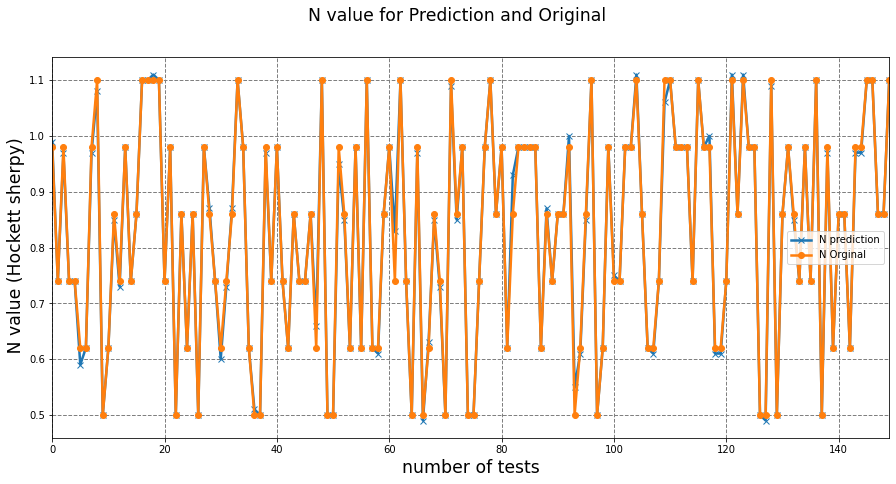

In [28]:
x  = np.arange(150)
y1 = predictions[:,5]
y2 = Y_predict[:,5]
### Using plt.xxx functions
plt.figure(figsize=(15,7))
plt.plot(x, y1, lw=2.5 , label='N prediction',marker='x')
plt.plot(x, y2, lw=2.5 , label='N Orginal',marker='o')

plt.xlim( x.min(), x.max())
plt.xlabel( 'number of tests',fontsize='xx-large')
plt.ylabel( ' N value (Hockett sherpy)',fontsize='xx-large' )
plt.grid( ls='--', color='gray', linewidth=1 )
plt.legend()
plt.suptitle('N value for Prediction and Original',fontsize='xx-large' )
plt.show()

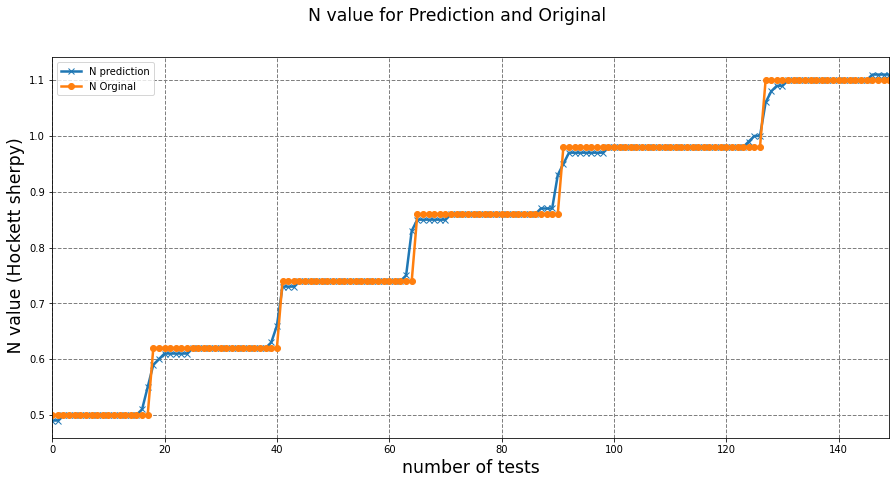

In [29]:
x  = np.arange(150)
y1 = predictions[:,5]
y2 = Y_predict[:,5]
y1 = np.sort(y1)
y2 = np.sort(y2)
### Using plt.xxx functions
plt.figure(figsize=(15,7))
plt.plot(x, y1, lw=2.5 , label='N prediction',marker='x')
plt.plot(x, y2, lw=2.5 , label='N Orginal',marker='o')

plt.xlim( x.min(), x.max())
plt.xlabel( 'number of tests',fontsize='xx-large')
plt.ylabel( ' N value (Hockett sherpy)',fontsize='xx-large' )
plt.grid( ls='--', color='gray', linewidth=1 )
plt.legend()
plt.suptitle('N value for Prediction and Original',fontsize='xx-large' )
plt.show()

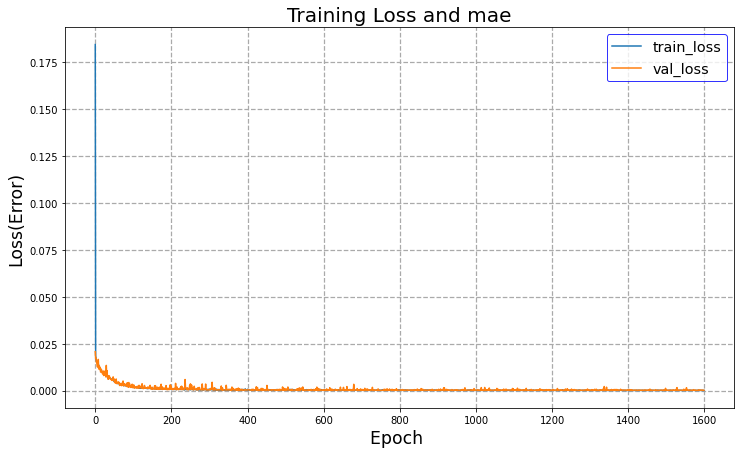

In [30]:
#plt.style.use("ggplot")
plt.figure(figsize=(12,7))
plt.plot(history.history["loss"], label="train_loss",lw=1.5)
plt.plot(history.history["val_loss"], label="val_loss",lw=1.5)
#plt.plot(history.history["mae"], label="train_mae",lw=1.5)
#plt.plot(history.history["val_mae"], label="val_mae",lw=1.5)
plt.title("Training Loss and mae",fontsize=20)
plt.xlabel("Epoch ",fontsize='xx-large')
plt.ylabel("Loss(Error)",fontsize='xx-large')
plt.legend(edgecolor='blue',fontsize='x-large')
plt.grid(ls='--', color='#AAAAAA',linewidth=1.25 )
#plt.savefig(args["output"])

In [31]:
model.save("/content/drive/MyDrive/Colab Notebooks/10150CNN1600epochAdamxwithoutscaler")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/10150CNN1600epochAdamxwithoutscaler/assets


In [32]:
model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/10150CNN1600epochAdamxwithoutscaler")